In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Question 1-A

- Image Acquisition / Optics
- Analog - Discrete Converter
- Digital Signal Processing

Functions of DSP Subsystem:
- Demosaicing
- Sharpening

## Question 1-B

Two places where fault could arise:
- Kernel Values
- Convolution function

To check if the kernel values are right:
- For **sharpening** the filter values must add up to zero
- For **smoothing** the filter values must add up to one

To check if the convolution function is not faulty:
- For **smoothing** the sum of pixel values in the image before and after the convolution operation should be equal
- For **sharpening** the sum of pixel values in the image after the convolution operation should be zero.

## Question 2

#### Consider the sequences, x(n) = {1, 2, 3, 5} and h(n) = {0.5, 0.5}

In [2]:
# Convolution
def convolution(x, h):
    h = h[::-1]
    x = [0]*(len(h)-1) + x + [0]*(len(h)-1)
    
    output = []
    for i in range(len(x) - len(h) + 1):
        output.append(np.array(h)@np.array(x[i:i+len(h)]).T)
        
    return output

# Correlation
def correlation(x, h):
    x = [0]*(len(h)-1) + x + [0]*(len(h)-1)
    
    output = []
    for i in range(len(x) - len(h) + 1):
        output.append(np.array(h)@np.array(x[i:i+len(h)]).T)
        
    return output

#### Find the correlation and convolution between the sequences x(n) and h(n).

In [3]:
x = [1, 2, 3, 5]
h = [0.5, 0.5]

print("Correlation : ", correlation(x, h))
print("Convolution : ", convolution(x, h))

Correlation :  [0.5, 1.5, 2.5, 4.0, 2.5]
Convolution :  [0.5, 1.5, 2.5, 4.0, 2.5]


#### For the above problem, let y(n) = x(n) * h(n). Find $\sum_{-\infty}^{\infty} y(n)$ where h(n) = {0.5, -0.5}

In [4]:
x = [1, 2, 3, 5]
h = [0.5, -0.5]

print("Sum : ", sum(convolution(x, h)))

Sum :  0.0


## Question 3-A

Assuming K is a kernel of size 2*a + 1 with its values adding up to 1

$$ \sum_{i=1}^{m}\sum_{j=1}^{n} \hat{I}_{i,j} = \sum_{i=1}^{m}\sum_{j=1}^{n} (\sum_{s=-a}^{a}\sum_{t=-a}^{a}K_{st} \times I_{i-s_,j-t} ) $$ 

We know that,
$$\sum_{s=-a}^{a} \sum_{t=-a}^{a} K_{s,t} = 1 $$

Therefore the first equation can be rewritten as,
$$ \sum_{i=1}^{m}\sum_{j=1}^{n} \hat{I}_{i,j} = \sum_{i=1}^{m}\sum_{j=1}^{n} (\sum_{s=-a}^{a}\sum_{t=-a}^{a}I_{i-s_,j-t} ) $$ 
$$ \Rightarrow \sum_{i=1}^{m}\sum_{j=1}^{n} \hat{I}_{i,j} = \sum_{i=1}^{m}\sum_{j=1}^{n} I_{i,j} $$


## Question 3-B
Assuming K is a kernel of size 2*a + 1 with its values adding up to 0

$$ \sum_{i=1}^{m}\sum_{j=1}^{n} \hat{I}_{i,j} = \sum_{i=1}^{m}\sum_{j=1}^{n} (\sum_{s=-a}^{a}\sum_{t=-a}^{a}K_{st} \times I_{i-s_,j-t} ) $$ 

We know that,
$$\sum_{s=-a}^{a} \sum_{t=-a}^{a} K_{s,t} = 0 $$

Therefore the first equation can be rewritten as,
$$ \sum_{i=1}^{m}\sum_{j=1}^{n} \hat{I}_{i,j} = \sum_{i=1}^{m}\sum_{j=1}^{n} (\sum_{s=-a}^{a}\sum_{t=-a}^{a}0 ) $$ 
$$ \Rightarrow \sum_{i=1}^{m}\sum_{j=1}^{n} \hat{I}_{i,j} = \sum_{i=1}^{m}\sum_{j=1}^{n} 0 $$
$$ \Rightarrow \sum_{i=1}^{m}\sum_{j=1}^{n} \hat{I}_{i,j} = 0 $$


## Simulation

In [5]:
def convolve2d(image, kernel):
    
    kernel_size = kernel.shape[0]
    image_size  = image.shape[0]
    
    padding = int((kernel_size - 1))
    image = np.pad(image, padding, mode="constant")

    output_shape = (image_size + 2*padding - kernel_size) + 1    
    output = np.zeros((output_shape, output_shape))
    
    for x in range(output_shape):
        for y in range(output_shape):
            mat = image[x:x+kernel_size, y:y+kernel_size]
            output[x, y] = np.sum(mat*kernel)
            
    return output

#### Kernel whose coefficients sum to 1

In [6]:
image = np.array([[2, 5, 4, 3, 7], [0, 7, 2, 1, 1], [3, 0, 0, 1, 1], [2, 3, 2, 4, 6], [1, 2, 2, 4, 0]])
box_filter = (1/9)*np.array(([[1, 1, 1], [1, 1, 1], [1, 1, 1]]))

convolved_image = convolve2d(image, box_filter)

print("Image Sum : ", np.sum(image))
print("Convolved Image Sum : ", np.sum(convolved_image))

Image Sum :  63
Convolved Image Sum :  63.0


#### Kernel whose coefficients sum to 0

In [7]:
image = np.array([[2, 5, 4, 3, 7], [0, 7, 2, 1, 1], [3, 0, 0, 1, 1], [2, 3, 2, 4, 6], [1, 2, 2, 4, 0]])
sharp_filter = np.array(([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]]))

convolved_image = convolve2d(image, sharp_filter)

print("Image Sum : ", np.sum(image))
print("Convolved Image Sum : ", np.sum(convolved_image))

Image Sum :  63
Convolved Image Sum :  0.0


## Question 4-A

Given,
$$ f_x = c $$
$$ f_y = \lambda \mathrm{e}^{-\lambda y} $$

$$ \Rightarrow F_x(x) = \int_{0}^{10} f_x \: dx = \int_{0}^{10} c\: dx = cx $$
$$ \Rightarrow F_y(y) = \int f_y \: dy = \int \lambda \mathrm{e}^{-\lambda y}\: dy = -\mathrm{e}^{-{\lambda}y} $$

We know 
$$  F_x(x) = F_y(y) $$
$$ \Rightarrow cx = -\mathrm{e}^{-{\lambda}y} $$
$$ \Rightarrow \log cx = {\lambda}y $$
$$ \Rightarrow y = \frac{\log cx}{\lambda} $$

## Question 4-B

In [8]:
image = np.array([[2, 5, 4, 3, 7], [0, 7, 2, 1, 1], [3, 0, 0, 1, 1], [2, 3, 2, 4, 6], [1, 2, 2, 4, 0]])
box_filter = (1/9)*np.array(([[1, 1, 1], [1, 1, 1], [1, 1, 1]]))

convolved_image = convolve2d(image, box_filter)

convolved_image

array([[0.22222222, 0.77777778, 1.22222222, 1.33333333, 1.55555556,
        1.11111111, 0.77777778],
       [0.22222222, 1.55555556, 2.22222222, 2.44444444, 2.        ,
        1.33333333, 0.88888889],
       [0.55555556, 1.88888889, 2.55555556, 2.55555556, 2.22222222,
        1.55555556, 1.        ],
       [0.55555556, 1.66666667, 2.11111111, 2.22222222, 2.        ,
        1.55555556, 0.88888889],
       [0.66666667, 1.22222222, 1.66666667, 2.        , 2.22222222,
        1.77777778, 0.77777778],
       [0.33333333, 0.88888889, 1.33333333, 1.88888889, 2.        ,
        1.55555556, 0.66666667],
       [0.11111111, 0.33333333, 0.55555556, 0.88888889, 0.66666667,
        0.44444444, 0.        ]])

## Question 5

#### Histogram

(array([2., 1., 1., 3., 3., 6., 5., 4.]),
 array([0.   , 0.875, 1.75 , 2.625, 3.5  , 4.375, 5.25 , 6.125, 7.   ]),
 <BarContainer object of 8 artists>)

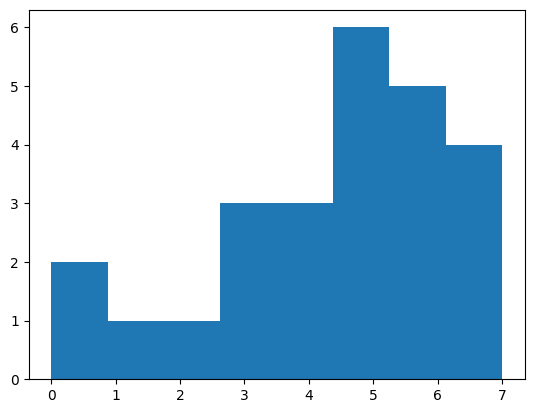

In [9]:
image = np.array([[2, 5, 4, 3, 7], [0, 7, 2, 1, 1], [3, 0, 0, 1, 1], [2, 3, 2, 4, 6], [1, 2, 2, 4, 0]])
neg_image = 7 - image

plt.hist(neg_image.flatten(), bins=8)

#### histogram equalization

In [10]:
image_d = {no:list(image.flatten()).count(no)/len(image.flatten()) for no in range(8)}

image_c = [0] * 8
for i in range(8):
    if i:
        image_c[i] = image_d[i] + image_c[i-1]
    else:
        image_c[i] = image_d[i]

mapping = {no:round(image_c[no]*7) for no in range(8)}

new_image = np.zeros(image.shape)
for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        new_image[i, j] = mapping[image[i, j]]
        
new_image

array([[4., 6., 6., 5., 7.],
       [1., 7., 4., 3., 3.],
       [5., 1., 1., 3., 3.],
       [4., 5., 4., 6., 6.],
       [3., 4., 4., 6., 1.]])